In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading test data from text file

In [2]:
import pandas as pd 
df=pd.read_csv('/content/drive/MyDrive/test-Minimum-Error-Rate-Classifier.txt',header=None)
df = pd.DataFrame(df)

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df

,0,1
0,1,1.0
1,1,-1.0
2,4,5.0
3,-2,2.5
4,0,2.0
5,2,-3.0


In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
x = df[0]
y = df[1]

In [6]:
x=x.to_numpy()
y=y.to_numpy()

In [7]:
test=[]
for i in zip(x,y):
  test.append(i)

In [8]:
test=np.array(test)

In [9]:
mu1 = [0,0];
Sigma1 = [[.25,.3],[.3,1]];
mu2 = [2,2];
Sigma2 = [[.5,0],[0,.5]];

In [10]:
mu1=np.array(mu1);
Sigma1=np.array(Sigma1);
mu2=np.array(mu2);
Sigma2=np.array(Sigma2);

In [11]:
mu1=mu1.reshape(1,2)
mu2=mu2.reshape(1,2)

Classification of test set according to discriminant function

In [12]:
g1=np.zeros((1,1))
g2=np.zeros((1,1))
clss=[]
for i in range(6):
  g1= -np.log(2*np.pi)-0.5*np.log(np.linalg.det(Sigma1))-0.5*np.matmul(np.matmul((np.transpose((test[i]-mu1).reshape(2,1))),np.linalg.inv(Sigma1)),((test[i])-(mu1)).reshape(2,1))+np.log(0.5)
  g2= -np.log(2*np.pi)-0.5*np.log(np.linalg.det(Sigma2))-0.5*np.matmul(np.matmul((np.transpose((test[i]-mu2).reshape(2,1))),np.linalg.inv(Sigma2)),((test[i])-(mu2)).reshape(2,1))+np.log(0.5)
  print(g1)
  print(g2)
  if g1>g2:
    print('Sample',i,'in Class 1')
    clss.append(1)
  else:
    print('Sample',i,'in Class 2')
    clss.append(2)


[[-3.64598352]]
[[-3.83787707]]
Sample 0 in Class 1
[[-7.39598352]]
[[-11.83787707]]
Sample 1 in Class 1
[[-33.64598352]]
[[-14.83787707]]
Sample 2 in Class 2
[[-28.37254602]]
[[-18.08787707]]
Sample 3 in Class 2
[[-4.73973352]]
[[-5.83787707]]
Sample 4 in Class 1
[[-32.39598352]]
[[-26.83787707]]
Sample 5 in Class 2


In [13]:
new=[]
for i in zip(test.tolist(),clss):
  new.append(i)
# new[0][0]
# new[3][0]
new

[([1.0, 1.0], 1),
 ([1.0, -1.0], 1),
 ([4.0, 5.0], 2),
 ([-2.0, 2.5], 2),
 ([0.0, 2.0], 1),
 ([2.0, -3.0], 2)]

In [14]:
C1=[]
C2=[]
for i in new:
  if i[1]==1:
    C1.append(list(i[0]))
  else:
    C2.append(list(i[0]))
# list(C1[0])
C1=np.array(C1)
C2=np.array(C2)

In [15]:
C1

array([[ 1.,  1.],
       [ 1., -1.],
       [ 0.,  2.]])

Plotting test classes

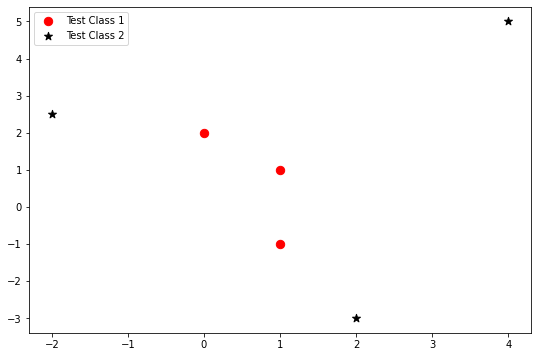

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (9,6)
plt.scatter(C1[:,0], C1[:,1], marker='o', c='red',s=70,label='Test Class 1')
plt.scatter(C2[:,0], C2[:,1], marker='*', c='black',s=70,label='Test Class 2')
plt.legend()

3D and 2D contour plot of Decision Regions along with Decision Boundaries

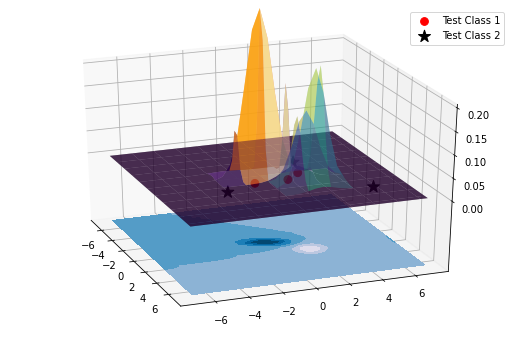

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 32
X = np.linspace(-7, 7, N)
Y = np.linspace(-7, 7, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu1 = np.array([0., 0.])
Sigma1 = np.array([[ .25 , 0.3], [.3,  1.]])
mu2 = np.array([2.,2.])
Sigma2 = np.array([[ .5 , 0.], [0.,  .5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
# print(X)

def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N

Z1 = multivariate_gaussian(pos, mu1, Sigma1)
# print(mu.shape[0])
Z2 = multivariate_gaussian(pos, mu2, Sigma2)
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
db=Z1-Z2


ax.scatter(C1[:,0], C1[:,1], marker='o', c='red',s=60,label='Test Class 1',alpha= 1.0)
ax.scatter(C2[:,0], C2[:,1], marker='*', c='black',s=160,label='Test Class 2',alpha= 1.0)


ax.plot_surface(X, Y, Z1, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.inferno, alpha= .7)
ax.plot_surface(X, Y, Z2, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis, alpha= .4)
ax.contourf(X, Y, db, zdir='z', offset=-0.15, cmap=cm.PuBu )

ax.legend()

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

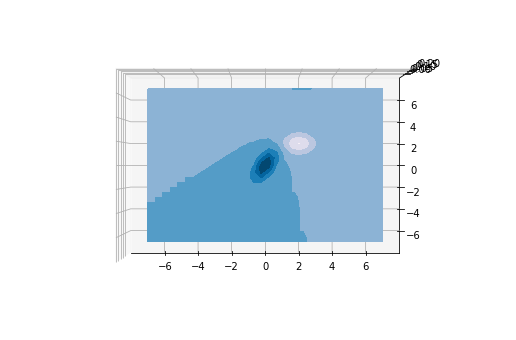

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 32
X = np.linspace(-7, 7, N)
Y = np.linspace(-7, 7, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu1 = np.array([0., 0.])
Sigma1 = np.array([[ .25 , 0.3], [.3,  1.]])
mu2 = np.array([2.,2.])
Sigma2 = np.array([[ .5 , 0.], [0.,  .5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
# print(X)

def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N

Z1 = multivariate_gaussian(pos, mu1, Sigma1)
# print(mu.shape[0])
Z2 = multivariate_gaussian(pos, mu2, Sigma2)
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
db=Z1-Z2


# ax.scatter(C1[:,0], C1[:,1], marker='o', c='red',s=60,label='Test Class 1',alpha= 1.0)
# ax.scatter(C2[:,0], C2[:,1], marker='*', c='black',s=160,label='Test Class 2',alpha= 1.0)


# ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
#                 cmap=cm.inferno, alpha= .7)
# ax.plot_surface(X, Y, Z1, rstride=3, cstride=3, linewidth=1, antialiased=True,
#                 cmap=cm.viridis, alpha= .4)
ax.contourf(X, Y, db, zdir='z', offset=-0.15, cmap=cm.PuBu )

# ax.legend()

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(90, -90)

plt.show()